# **Implementación de Newton Raphson para 3 dimensiones**
**Facultad de ingeniería**

Departamento de Ingeniería de Sistemas y computación

Universidad de los Andes

**ISIS-3302:** Modelado, Simulación y Optimización


**Nombres de los integrantes**


1.   Daniel Felipe Diaz Moreno
2.   Sara Sofía Cárdenas Rodríguez

**Número del grupo**

15


Importación de librerias

In [307]:
!pip install sympy
from sympy import symbols, Eq, latex, diff, hessian, Matrix, sqrt

# Para mostrar ecuaciones en formato LaTeX
from IPython.display import display, Math

# Para mostrar gráficas
import matplotlib.pyplot as plt
import numpy as np

In [308]:
def f(x,y):
    return (x-1)**2 + 100*(y-x**2)**2

x, y, z = symbols('x y z')
display(Math(latex(Eq(z, f(x,y)))))

<IPython.core.display.Math object>

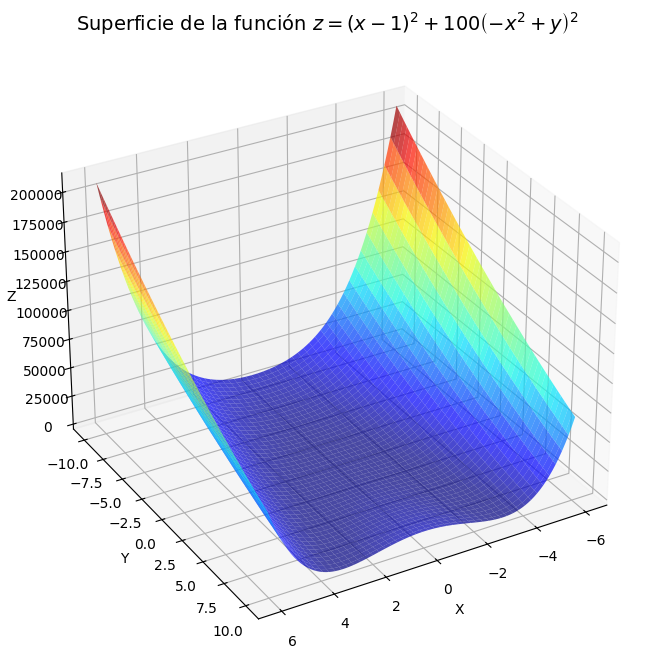

In [309]:
def graficarFuncionYPunto(funcion, valoresDeXY):
    X = np.linspace(-6, 6, 100)
    Y = np.linspace(-10, 10, 200)
    X, Y = np.meshgrid(X, Y)

    Z = funcion(X, Y)

    fig = plt.figure(figsize=(8, 10))
    ax = fig.add_subplot(111, projection='3d')


    ax.plot_surface(X, Y, Z, cmap='jet', alpha=0.7)


    ax.set_title(f'Superficie de la función ${latex(Eq(z, f(x,y)))}$', fontsize=14)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    for i, valorDeXY in enumerate(valoresDeXY):
        valorDeX, valorDeY = valorDeXY
        valorDeZ = funcion(valorDeX, valorDeY)
        color = (0, 1, 1) 
        if i == len(valoresDeXY) - 1:
            color = (1, 0, 0) 
            
        ax.scatter(valorDeX, valorDeY, valorDeZ, color=color, s=100, label=f'Punto ({valorDeX:.2f}, {valorDeY:.2f}, {valorDeZ:.2f})')
    if valoresDeXY:
        ax.legend()

    ax.view_init(azim=60)

    
    plt.show()

graficarFuncionYPunto(f, [])

In [310]:
def gradiente(f, punto):
    valorX, valorY = punto
    variables = [x, y]
    gradienteSinEvaluar = [diff(f, variable) for variable in variables]
    return Matrix([grad.subs({x: valorX, y: valorY}) for grad in gradienteSinEvaluar])

def hessiana(f, punto):
    valorX, valorY = punto
    variables = [x, y]
    hessianaSinEvaluar = hessian(f, variables)
    return hessianaSinEvaluar.subs({x: valorX, y: valorY})


def norma(vector):
    return sqrt(sum(comp**2 for comp in vector))

def newtonRaphson(f, x_0, y_0, a):
    i = 0
    valoresXY = [Matrix([x_0, y_0])]
    convergencia=0.001
    while norma(gradiente(f, valoresXY[i])) > convergencia:
        print(a * (hessiana(f, valoresXY[i]).inv() @ gradiente(f, valoresXY[i])))
        valoresXY.append(valoresXY[i] - a * (hessiana(f, valoresXY[i]).inv() @ gradiente(f, valoresXY[i])))
        i += 1
    x_gorro = valoresXY[-1]
    return x_gorro, valoresXY



In [311]:
xyEncontrados, valoresXY = newtonRaphson(f(x,y), 0, 10, 1)
xEncontrado, yEncontrado = [variable for variable in xyEncontrados]
puntoInflexion = (xEncontrado, yEncontrado, f(xEncontrado, yEncontrado))
print(f'El punto de inflexión es: {puntoInflexion}')
print(f'El punto de inflexión es aproximadamente: x = {puntoInflexion[0]:.2f}, y = {puntoInflexion[1]:.2f}, z = {puntoInflexion[2]:.2f}')

Matrix([[1/1999], [10]])
Matrix([[-3998000/3996201], [15980007799/15968823192201]])
Matrix([[-1598480400000/6422328074442369599], [-205206482797116346034087692323200000/205021746817221316409555993319420801]])
El punto de inflexión es: (12838236694894783308601/12838876374894783308601, 205001317452515130549011833319420801/205021746817221316409555993319420801, 67442879936602722404351227364363054955122853763360300034560000000000000000000000/27168433389448456735317651212388872046462615464837285865487513557475590956112325177754001)
El punto de inflexión es aproximadamente: x = 1.00, y = 1.00, z = 0.00


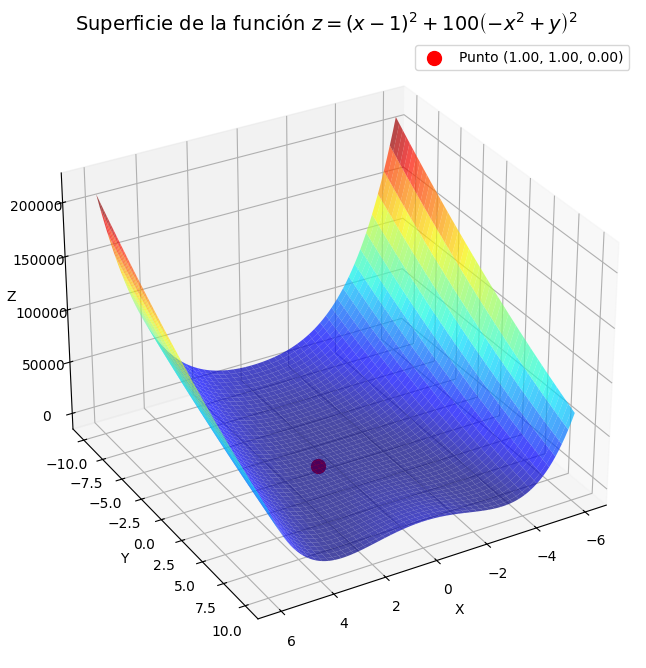

In [312]:

graficarFuncionYPunto(f, [(xEncontrado, yEncontrado)])

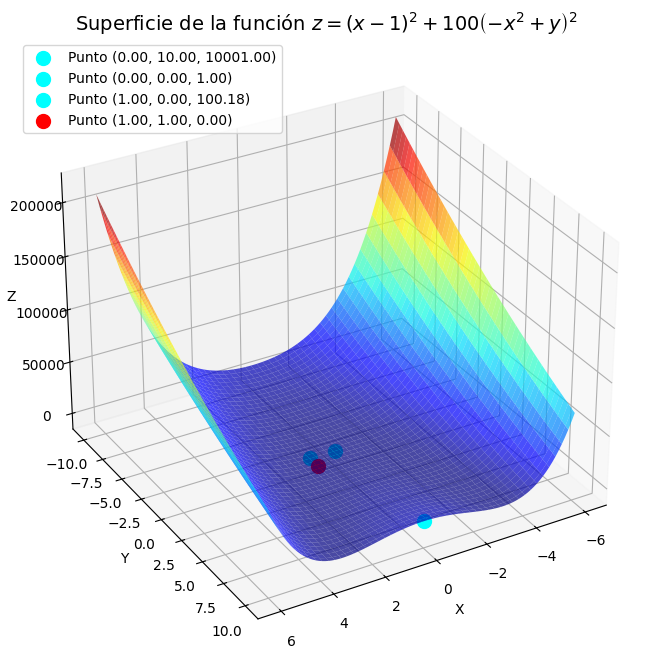

In [313]:
graficarFuncionYPunto(f, valoresXY)